# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# %matplotlib inline
# %matplotlib notebook

In [2]:
# df = pd.read_csv('./SINASC_2019.csv', sep=';')
df = pd.read_csv('./input/SINASC_2019.csv', sep=';')

/var/folders/wh/_2xtz5kd2knd10y0m8tmqhrc0000gp/T/ipykernel_49480/3165088887.py:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./input/SINASC_2019.csv', sep=';')


In [5]:
df.head()
# df.describe()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR
0,1,2515504.0,110002,1,31.0,2.0,5.0,999992.0,1.0,0.0,...,0.0,NaN,8.0,0.0,1,1.0,5,1,5,1018
1,1,2516292.0,110015,1,34.0,4.0,4.0,621005.0,1.0,0.0,...,3.0,27042019.0,12.0,0.0,1,1.0,5,1,5,5430
2,1,5618347.0,110020,1,35.0,2.0,4.0,621005.0,1.0,0.0,...,3.0,26012019.0,12.0,0.0,1,1.0,4,1,5,6228
3,1,5618347.0,110020,1,26.0,5.0,5.0,NaN,1.0,NaN,...,3.0,2032019.0,7.0,0.0,1,1.0,5,1,4,7059
4,1,5618347.0,110020,1,23.0,5.0,3.0,999992.0,4.0,0.0,...,3.0,30032019.0,2.0,0.0,1,1.0,3,1,2,7284


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [51]:
print(df['APGAR5'].isna().sum() / len(df))

0.015626436834054836


In [61]:
df['SEXO'].unique()

array([1, 2, 0])

In [92]:
# limpando a base de dados
df2 = df[(df['APGAR5'].isna() == False) & (df['APGAR5'] < 99.00) & (df['SEXO'] != 0) & (df['GESTACAO'] < 9)] 

# df2 = df[df['APGAR5'] < 99.00]
# df2 = df[df['SEXO'] != 0]

df2['APGAR5'].isna().sum()
df2['APGAR5'].unique()

array([10.,  9.,  6.,  8.,  4.,  7.,  3.,  2.,  5.,  0.,  1.])

In [93]:
# transformando o APGAR5 em uma variável categórica
df2.loc[df2['APGAR5'] <= 3.0, 'APGAR5_CAT'] = 'asfixia grave'.upper()
df2.loc[(df2['APGAR5'] >= 4.0) & (df2['APGAR5'] <= 5.0), 'APGAR5_CAT'] = 'asfixia moderada'.upper()
df2.loc[(df2['APGAR5'] >= 6.0) & (df2['APGAR5'] <= 7.0), 'APGAR5_CAT'] = 'asfixia leve'.upper()
df2.loc[(df2['APGAR5'] >= 8.0) & (df2['APGAR5'] <= 10.0), 'APGAR5_CAT'] = 'normal'.upper()

/var/folders/wh/_2xtz5kd2knd10y0m8tmqhrc0000gp/T/ipykernel_49480/4000941898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['APGAR5'] <= 3.0, 'APGAR5_CAT'] = 'asfixia grave'.upper()


In [94]:
# transformando o sexo em uma variável categoria para facilidar a leitura no gráfico
df2.loc[(df2['SEXO'] == 1), 'SEXO_CAT'] = 'M'
df2.loc[(df2['SEXO'] == 2), 'SEXO_CAT'] = 'F'

/var/folders/wh/_2xtz5kd2knd10y0m8tmqhrc0000gp/T/ipykernel_49480/1847730283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[(df2['SEXO'] == 1), 'SEXO_CAT'] = 'M'


In [95]:
df2['APGAR5_CAT'].value_counts()

NORMAL              2710394
ASFIXIA LEVE          40191
ASFIXIA GRAVE          9229
ASFIXIA MODERADA       8612
Name: APGAR5_CAT, dtype: int64

In [96]:
df2['SEXO_CAT'].value_counts()

M    1416597
F    1351829
Name: SEXO_CAT, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

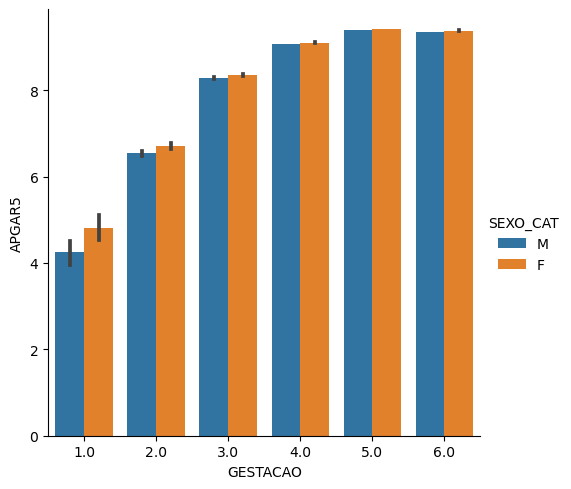

In [97]:
sns.catplot(
    data=df2,
    x='GESTACAO',
    y='APGAR5',
    hue='SEXO_CAT',
    kind='bar',
    # ci=None
)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [98]:
df2_ct = pd.crosstab(df2['GESTACAO'], df2['APGAR5'])
df2_ct


APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
1.0,159,383,112,54,32,44,39,62,66,259,149
2.0,454,915,494,498,612,822,1127,1887,2886,3095,1098
3.0,132,212,161,227,287,579,997,2405,6609,11769,4571
4.0,318,417,299,350,566,1085,2062,6475,30915,132462,91010
5.0,915,1350,823,802,1405,3038,5660,18654,112672,1083272,1166466
6.0,32,50,40,32,39,103,194,629,3293,29730,30072


In [99]:
df2_ct.sum(axis=1)

GESTACAO
1.0       1359
2.0      13888
3.0      27949
4.0     265959
5.0    2395057
6.0      64214
dtype: int64

In [100]:
df2_ct

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
1.0,159,383,112,54,32,44,39,62,66,259,149
2.0,454,915,494,498,612,822,1127,1887,2886,3095,1098
3.0,132,212,161,227,287,579,997,2405,6609,11769,4571
4.0,318,417,299,350,566,1085,2062,6475,30915,132462,91010
5.0,915,1350,823,802,1405,3038,5660,18654,112672,1083272,1166466
6.0,32,50,40,32,39,103,194,629,3293,29730,30072


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [126]:
df2_ct_pct = df2_ct.div(df2_ct.sum(axis=1), axis=0)
df2_ct_pct
# df2_ct_pct.sum(0)

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
1.0,0.116998,0.281825,0.082414,0.039735,0.023547,0.032377,0.028698,0.045622,0.048565,0.190581,0.109639
2.0,0.032690,0.065884,0.035570,0.035858,0.044067,0.059188,0.081149,0.135873,0.207805,0.222854,0.079061
3.0,0.004723,0.007585,0.005760,0.008122,0.010269,0.020716,0.035672,0.086050,0.236466,0.421088,0.163548
4.0,0.001196,0.001568,0.001124,0.001316,0.002128,0.004080,0.007753,0.024346,0.116240,0.498054,0.342196
5.0,0.000382,0.000564,0.000344,0.000335,0.000587,0.001268,0.002363,0.007789,0.047044,0.452295,0.487031
6.0,0.000498,0.000779,0.000623,0.000498,0.000607,0.001604,0.003021,0.009795,0.051282,0.462983,0.468309


<AxesSubplot:xlabel='GESTACAO'>

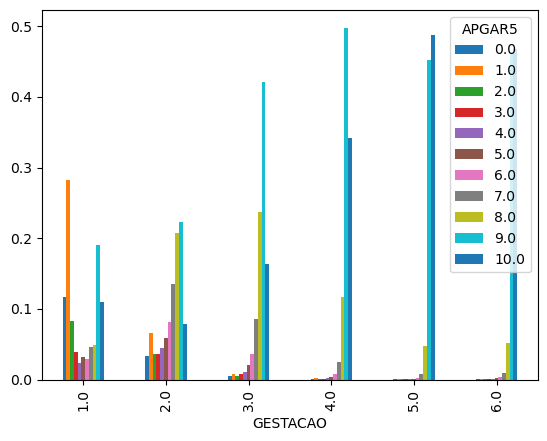

In [102]:
# quis ver as porcentagens de apgar por tempo de gestacao
# sns.catplot(
#     data=df2_ct_pct,
#     # x='GESTACAO',
#     # y='APGAR5',
#     kind='bar',
#     ci=None,
#     estimator=sum
# )

df2_ct_pct.plot.bar()

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

Nesse cenário tenho que levar em conta duas coisas a maior parte dos partos acontecem na gestação a partir de 32 semanas sendo que a partir de 37 semanas os indices de APGAR5 são melhores mesmo que por pouca diferença na maioria dos partos, pode haver uma outra variável que contribua para uma análise mais profunda.

<AxesSubplot:xlabel='GESTACAO'>

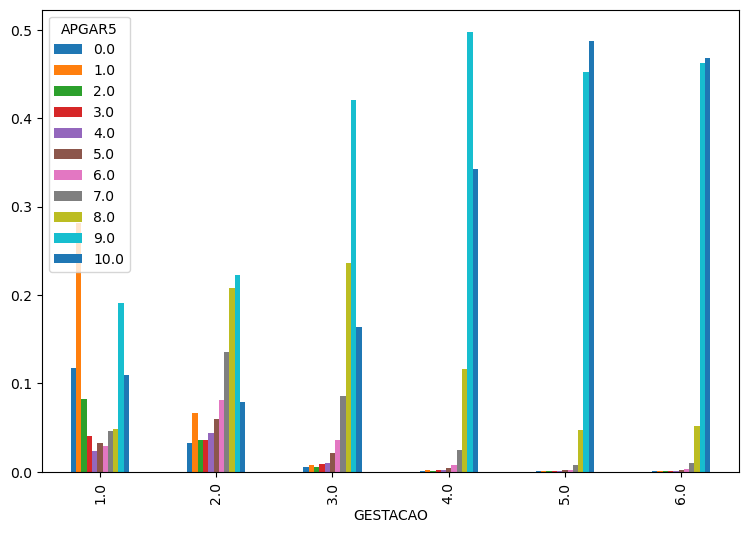

In [122]:
df2_ct_pct.plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

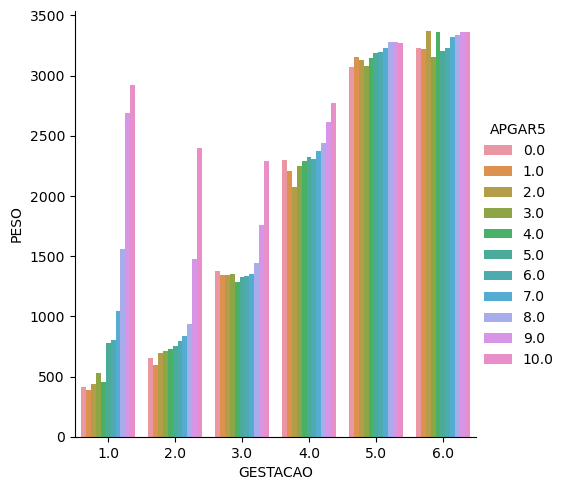

In [129]:
sns.catplot(
    data=df2,
    x='GESTACAO',
    y='PESO',
    hue='APGAR5',
    kind='bar',
    ci=None,
)

Pela análise desse gráfico o peso tem uma boa influência no APGAR5 no começo da gestacão até 31 semanas como foi observado acima quando citei que poderia ter uma outra variável, mas de 32 semanas de gestação em diante o peso não tem tanta influência assim no APGAR5.

In [130]:
sns.pairplot(df2, hue='GESTACAO')